# Анализ результатов измерений по ТП Лесная за 2021 год

In [619]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import seaborn as sns
plt.style.use('seaborn')

### Загрузка данных

In [620]:
fks_1_data_path =  'I:/Результаты_замеров_ТП_Лесная_Ф1_и_Ф2_2021/ФКС_1_2021_исследование_нагрузки.csv'

fks_2_data_path =  'I:/Результаты_замеров_ТП_Лесная_Ф1_и_Ф2_2021/ФКС_2_2021_исследование_нагрузки.csv'

In [621]:
fks_1 = pd.read_csv(fks_1_data_path, sep=';', skiprows=10)
fks_1.head()

,Unnamed: 0,Unnamed: 1,'О','P','Г','Т','A',дата,Время (UTC+0),U L1 макс [В],I L1 макс [A],THD U L1 макс [%],THD I L1 макс [%],cos(φ) L1 макс [---]
0,NaN,NaN,'О',,'Г',,,2021-08-10,04:16:25.898,"99,821","148,04","7,15","29,08","-0,80"
1,NaN,NaN,'О',,'Г',,,2021-08-10,04:16:26.898,"99,849","148,13","7,29","28,99","-0,80"
2,NaN,NaN,'О',,'Г',,,2021-08-10,04:16:27.898,"99,944","147,39","7,31","28,25","-0,80"
3,NaN,NaN,'О',,'Г',,,2021-08-10,04:16:28.898,"100,02","140,78","7,52","29,06","-0,80"
4,NaN,NaN,'О',,'Г',,,2021-08-10,04:16:29.899,"100,07","138,53","7,48","29,33","-0,79"


In [622]:
fks_2 = pd.read_csv(fks_2_data_path, sep=';', skiprows=10)
fks_2.head()

,Unnamed: 0,Unnamed: 1,'О','P','Г','Т','A',дата,Время (UTC+0),U L1 макс [В],I L1 макс [A],THD U L1 макс [%],THD I L1 макс [%],cos(φ) L1 макс [---]
0,NaN,NaN,'О',,'Г',,,2021-08-10,04:03:37.223,"103,33","135,30","11,42","32,32","-0,85"
1,NaN,NaN,'О',,'Г',,,2021-08-10,04:03:38.223,"103,37","132,29","11,14","32,68","-0,84"
2,NaN,NaN,'О',,'Г',,,2021-08-10,04:03:39.224,"103,40","131,51","10,83","32,99","-0,84"
3,NaN,NaN,'О',,'Г',,,2021-08-10,04:03:40.224,"103,42","134,58","10,69","32,28","-0,84"
4,NaN,NaN,'О',,'Г',,,2021-08-10,04:03:41.224,"103,50","133,77","10,77","32,89","-0,84"


### Предварительная обработка данных

#### Удалим не нужные столбцы

In [623]:
fks_1.columns.to_list()

['Unnamed: 0',
 'Unnamed: 1',
 "'О'",
 "'P'",
 "'Г'",
 "'Т'",
 "'A'",
 'дата      ',
 'Время (UTC+0)',
 'U L1 макс [В]',
 'I L1 макс [A]',
 'THD U L1 макс [%]',
 'THD I L1 макс [%]',
 'cos(φ) L1 макс [---]']

In [624]:
fks_1.drop( columns=['Unnamed: 0',
            'Unnamed: 1',
            "'О'",
            "'P'",
            "'Г'",
            "'Т'",
            "'A'"], inplace= True)
fks_1.head()

,дата,Время (UTC+0),U L1 макс [В],I L1 макс [A],THD U L1 макс [%],THD I L1 макс [%],cos(φ) L1 макс [---]
0,2021-08-10,04:16:25.898,"99,821","148,04","7,15","29,08","-0,80"
1,2021-08-10,04:16:26.898,"99,849","148,13","7,29","28,99","-0,80"
2,2021-08-10,04:16:27.898,"99,944","147,39","7,31","28,25","-0,80"
3,2021-08-10,04:16:28.898,"100,02","140,78","7,52","29,06","-0,80"
4,2021-08-10,04:16:29.899,"100,07","138,53","7,48","29,33","-0,79"


In [625]:
fks_2.drop( columns=['Unnamed: 0',
                     'Unnamed: 1',
                     "'О'",
                     "'P'",
                     "'Г'",
                     "'Т'",
                     "'A'"], inplace= True)
fks_2.head()

,дата,Время (UTC+0),U L1 макс [В],I L1 макс [A],THD U L1 макс [%],THD I L1 макс [%],cos(φ) L1 макс [---]
0,2021-08-10,04:03:37.223,"103,33","135,30","11,42","32,32","-0,85"
1,2021-08-10,04:03:38.223,"103,37","132,29","11,14","32,68","-0,84"
2,2021-08-10,04:03:39.224,"103,40","131,51","10,83","32,99","-0,84"
3,2021-08-10,04:03:40.224,"103,42","134,58","10,69","32,28","-0,84"
4,2021-08-10,04:03:41.224,"103,50","133,77","10,77","32,89","-0,84"


#### Переименуем название столбцов

In [626]:
fks_1.columns.to_list()

['дата      ',
 'Время (UTC+0)',
 'U L1 макс [В]',
 'I L1 макс [A]',
 'THD U L1 макс [%]',
 'THD I L1 макс [%]',
 'cos(φ) L1 макс [---]']

In [627]:
columns_name = {'дата      ': 'date',
                'Время (UTC+0)': 'time',
                'U L1 макс [В]': 'voltage',
                'I L1 макс [A]': 'current',
                'THD U L1 макс [%]': 'THD_U',
                'THD I L1 макс [%]': 'THD_I',
                'cos(φ) L1 макс [---]': 'cos(φ)'}

In [628]:
fks_1 = fks_1.rename(columns = columns_name)
fks_1.head()

,date,time,voltage,current,THD_U,THD_I,cos(φ)
0,2021-08-10,04:16:25.898,"99,821","148,04","7,15","29,08","-0,80"
1,2021-08-10,04:16:26.898,"99,849","148,13","7,29","28,99","-0,80"
2,2021-08-10,04:16:27.898,"99,944","147,39","7,31","28,25","-0,80"
3,2021-08-10,04:16:28.898,"100,02","140,78","7,52","29,06","-0,80"
4,2021-08-10,04:16:29.899,"100,07","138,53","7,48","29,33","-0,79"


In [629]:
fks_2 = fks_2.rename(columns = columns_name)
fks_2.head()

,date,time,voltage,current,THD_U,THD_I,cos(φ)
0,2021-08-10,04:03:37.223,"103,33","135,30","11,42","32,32","-0,85"
1,2021-08-10,04:03:38.223,"103,37","132,29","11,14","32,68","-0,84"
2,2021-08-10,04:03:39.224,"103,40","131,51","10,83","32,99","-0,84"
3,2021-08-10,04:03:40.224,"103,42","134,58","10,69","32,28","-0,84"
4,2021-08-10,04:03:41.224,"103,50","133,77","10,77","32,89","-0,84"


#### Конвертируем дату и время

In [630]:
fks_1['date'] = pd.to_datetime(fks_1['date'])
fks_1['time'] = pd.to_datetime(fks_1['time']).dt.time
fks_1.head()

,date,time,voltage,current,THD_U,THD_I,cos(φ)
0,2021-08-10,04:16:25.898000,"99,821","148,04","7,15","29,08","-0,80"
1,2021-08-10,04:16:26.898000,"99,849","148,13","7,29","28,99","-0,80"
2,2021-08-10,04:16:27.898000,"99,944","147,39","7,31","28,25","-0,80"
3,2021-08-10,04:16:28.898000,"100,02","140,78","7,52","29,06","-0,80"
4,2021-08-10,04:16:29.899000,"100,07","138,53","7,48","29,33","-0,79"


In [631]:
fks_2['date'] = pd.to_datetime(fks_2['date'])
fks_2['time'] = pd.to_datetime(fks_2['time']).dt.time
fks_2.head()

,date,time,voltage,current,THD_U,THD_I,cos(φ)
0,2021-08-10,04:03:37.223000,"103,33","135,30","11,42","32,32","-0,85"
1,2021-08-10,04:03:38.223000,"103,37","132,29","11,14","32,68","-0,84"
2,2021-08-10,04:03:39.224000,"103,40","131,51","10,83","32,99","-0,84"
3,2021-08-10,04:03:40.224000,"103,42","134,58","10,69","32,28","-0,84"
4,2021-08-10,04:03:41.224000,"103,50","133,77","10,77","32,89","-0,84"


In [632]:
fks_1 = fks_1.set_index('time')
fks_2 = fks_2.set_index('time')

#### Конвертируем остальные переменные в числовые значения

In [633]:
# Удаление пробелов
fks_1.iloc[: ,-5:] = fks_1.iloc[: ,-5:].apply(lambda x : x.str.strip())

# Замена запятой на  точку
fks_1.iloc[: ,-5:] = fks_1.iloc[: ,-5:].apply(lambda x: x.str.replace(',','.'))

# Изменение типа данных на численные
fks_1.iloc[: ,-5:] = fks_1.iloc[: ,-5:].astype(float)

fks_1.head()

,date,voltage,current,THD_U,THD_I,cos(φ)
time,,,,,,
04:16:25.898000,2021-08-10,99.821,148.04,7.15,29.08,-0.80
04:16:26.898000,2021-08-10,99.849,148.13,7.29,28.99,-0.80
04:16:27.898000,2021-08-10,99.944,147.39,7.31,28.25,-0.80
04:16:28.898000,2021-08-10,100.020,140.78,7.52,29.06,-0.80
04:16:29.899000,2021-08-10,100.070,138.53,7.48,29.33,-0.79


In [634]:
# Удаление пробелов
fks_2.iloc[: ,-5:] = fks_2.iloc[: ,-5:].apply(lambda x : x.str.strip())

# Замена запятой на  точку
fks_2.iloc[: ,-5:] = fks_2.iloc[: ,-5:].apply(lambda x: x.str.replace(',','.'))

# Изменение типа данных на численные
fks_2.iloc[: ,-5:] = fks_2.iloc[: ,-5:].astype(float)

fks_2.head()

,date,voltage,current,THD_U,THD_I,cos(φ)
time,,,,,,
04:03:37.223000,2021-08-10,103.33,135.30,11.42,32.32,-0.85
04:03:38.223000,2021-08-10,103.37,132.29,11.14,32.68,-0.84
04:03:39.224000,2021-08-10,103.40,131.51,10.83,32.99,-0.84
04:03:40.224000,2021-08-10,103.42,134.58,10.69,32.28,-0.84
04:03:41.224000,2021-08-10,103.50,133.77,10.77,32.89,-0.84


#### Пересчетаем значение напряжения

In [635]:
fks_1['voltage'] = fks_1['voltage']*(27500/100)
fks_1['voltage'][:5]

time
04:16:25.898000    27450.775
04:16:26.898000    27458.475
04:16:27.898000    27484.600
04:16:28.898000    27505.500
04:16:29.899000    27519.250
Name: voltage, dtype: float64

In [636]:
fks_2['voltage'] = fks_2['voltage']*(27500/100)
fks_2['voltage'][:5]

time
04:03:37.223000    28415.75
04:03:38.223000    28426.75
04:03:39.224000    28435.00
04:03:40.224000    28440.50
04:03:41.224000    28462.50
Name: voltage, dtype: float64

#### Возьмем модуль cos(φ)

In [637]:
fks_1['cos(φ)'] = np.absolute(fks_1['cos(φ)'])
fks_1['cos(φ)'][:5]

time
04:16:25.898000    0.80
04:16:26.898000    0.80
04:16:27.898000    0.80
04:16:28.898000    0.80
04:16:29.899000    0.79
Name: cos(φ), dtype: float64

In [638]:
fks_2['cos(φ)'] = np.absolute(fks_2['cos(φ)'])
fks_2['cos(φ)'][:5]

time
04:03:37.223000    0.85
04:03:38.223000    0.84
04:03:39.224000    0.84
04:03:40.224000    0.84
04:03:41.224000    0.84
Name: cos(φ), dtype: float64

## Анализ результатов измерений

### Распределение значений переменных во времени

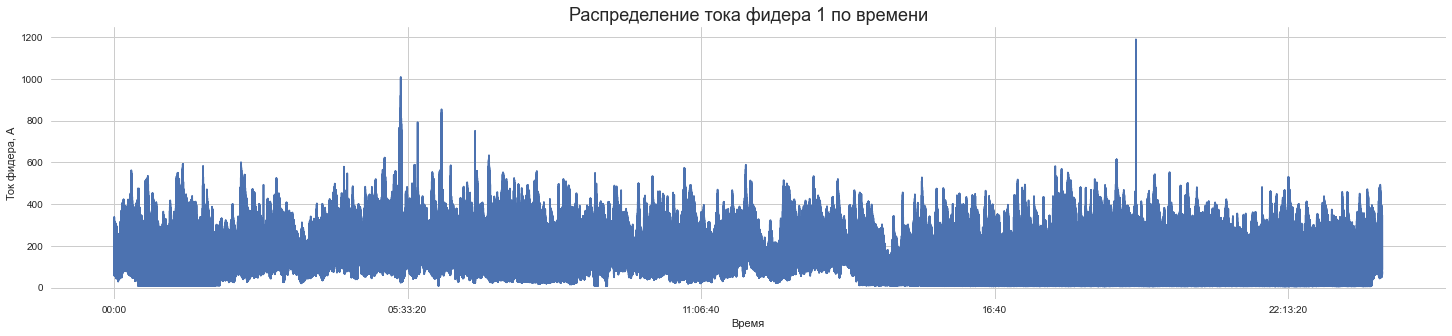

In [639]:
sns.set_style("whitegrid")
fks_1['current'].plot(figsize=(25, 5))
plt.title("Распределение тока фидера 1 по времени", fontsize=18)
plt.xlabel('Время')
plt.ylabel('Ток фидера, А')
plt.show()

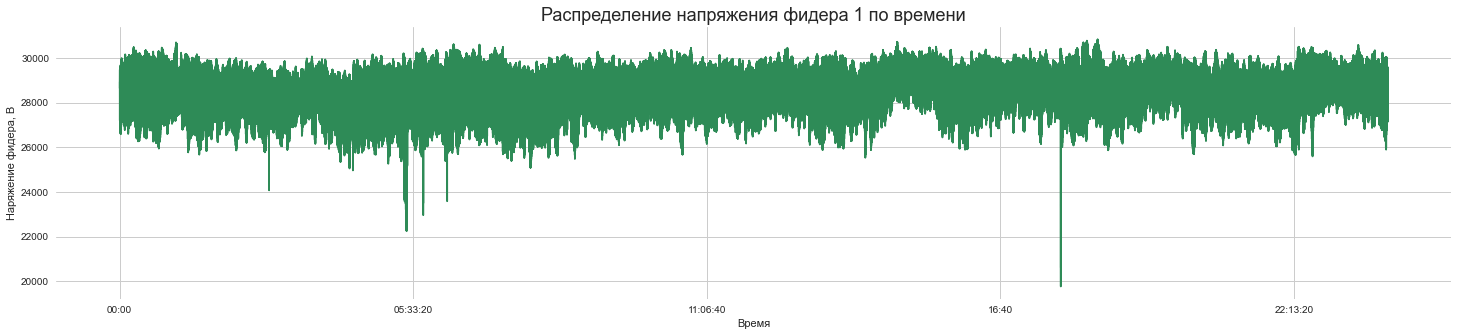

In [640]:
sns.set_style("whitegrid")
fks_1['voltage'].plot(figsize=(25, 5), color="seagreen")
plt.title("Распределение напряжения фидера 1 по времени", fontsize=18)
plt.xlabel('Время')
plt.ylabel('Наряжение фидера, В')
plt.show()

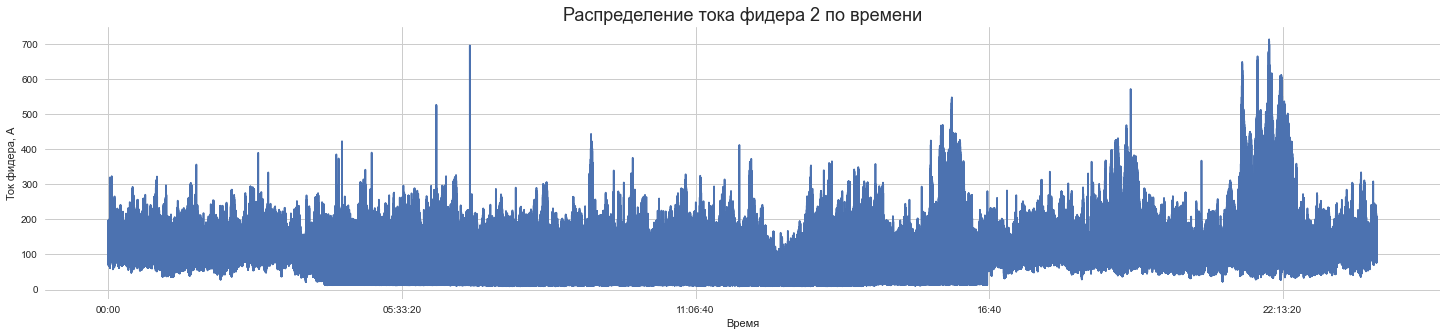

In [641]:
sns.set_style("whitegrid")
fks_2['current'].plot(figsize=(25, 5))
plt.title("Распределение тока фидера 2 по времени", fontsize=18)
plt.xlabel('Время')
plt.ylabel('Ток фидера, А')
plt.show()

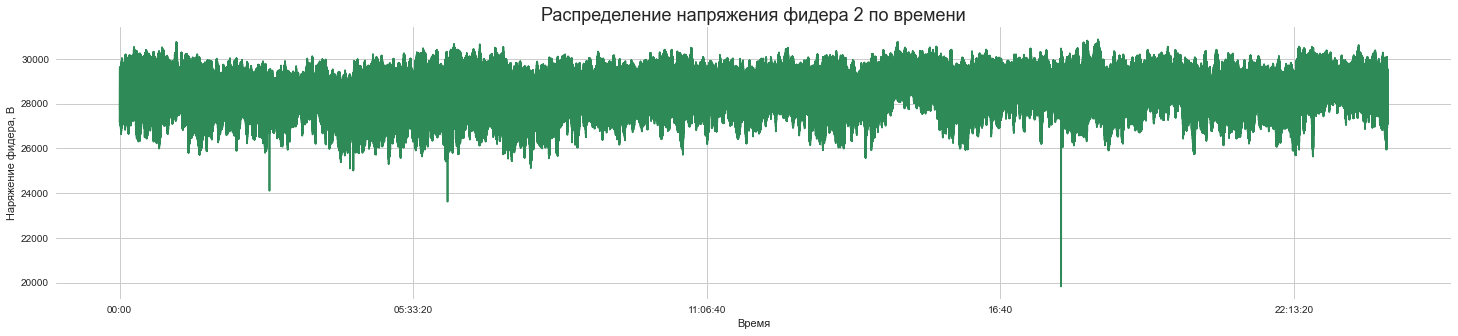

In [642]:
sns.set_style("whitegrid")
fks_2['voltage'].plot(figsize=(25, 5), color="seagreen")
plt.title("Распределение напряжения фидера 2 по времени", fontsize=18)
plt.xlabel('Время')
plt.ylabel('Наряжение фидера, В')
plt.show()

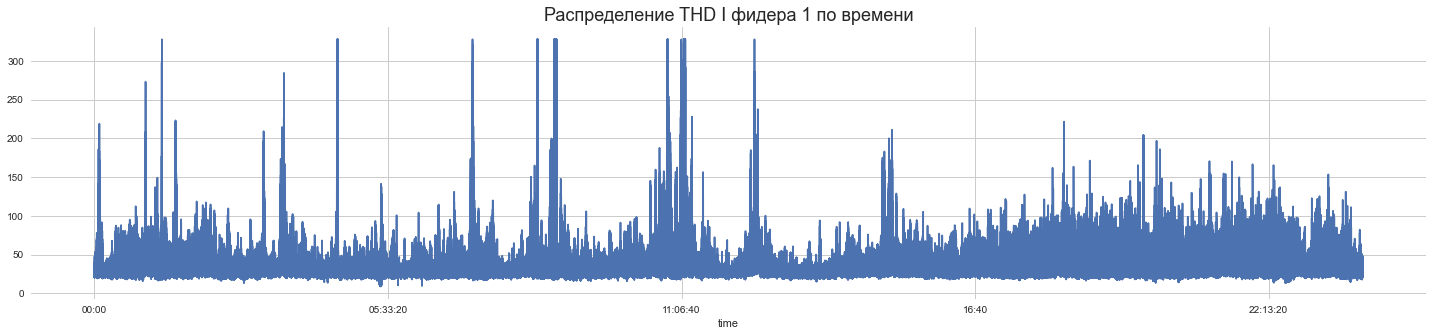

In [643]:
sns.set_style("whitegrid")
fks_1['THD_I'].plot(figsize=(25, 5))
plt.title("Распределение THD I фидера 1 по времени", fontsize=18)
plt.show()

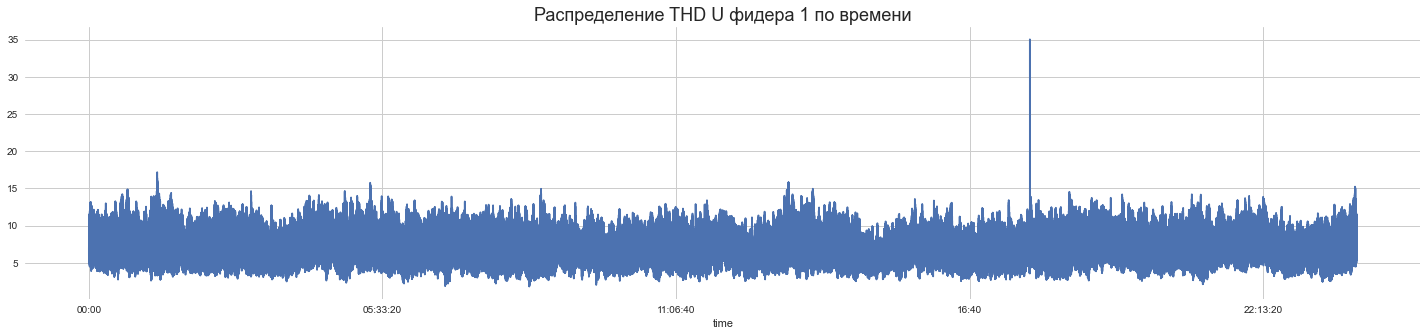

In [644]:
sns.set_style("whitegrid")
fks_1['THD_U'].plot(figsize=(25, 5))
plt.title("Распределение THD U фидера 1 по времени", fontsize=18)
plt.show()

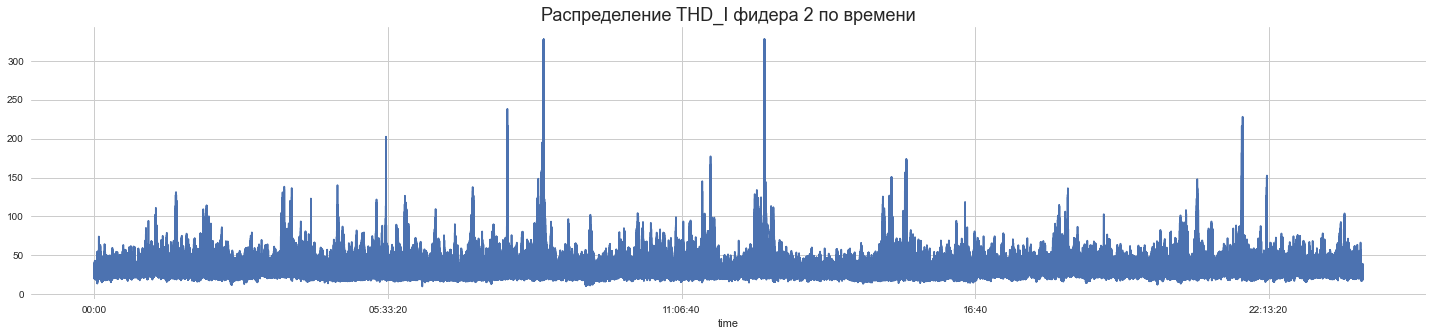

In [645]:
sns.set_style("whitegrid")
fks_2['THD_I'].plot(figsize=(25, 5))
plt.title("Распределение THD_I фидера 2 по времени", fontsize=18)
plt.show()

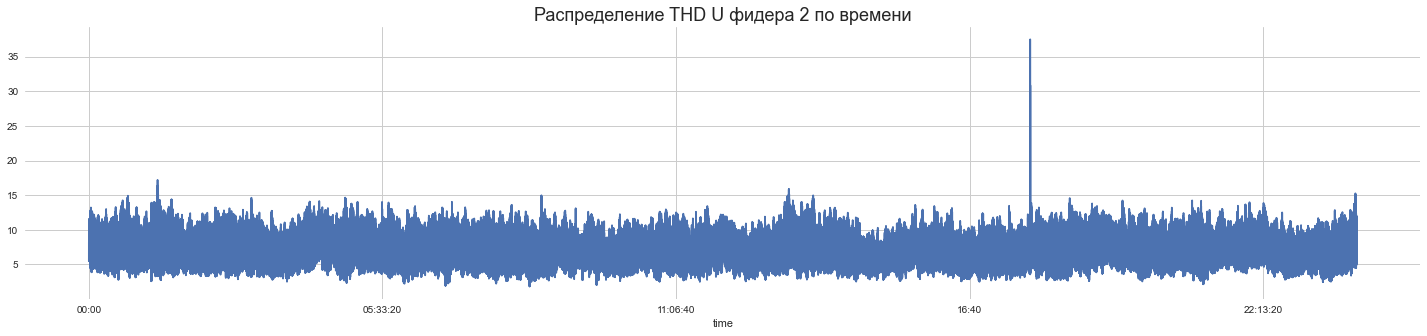

In [646]:
sns.set_style("whitegrid")
fks_2['THD_U'].plot(figsize=(25, 5))
plt.title("Распределение THD U фидера 2 по времени", fontsize=18)
plt.show()

### Распределение значений переменных

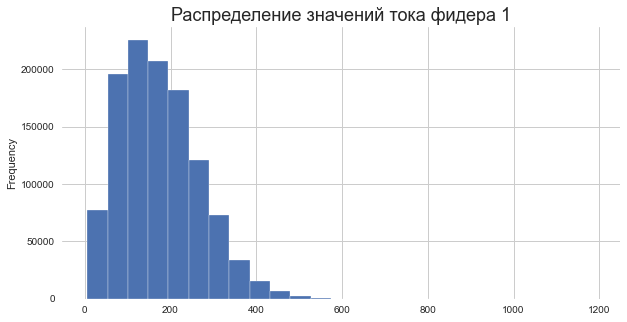

In [647]:
sns.set_style("whitegrid")
fks_1['current'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений тока фидера 1", fontsize=18)
plt.show()

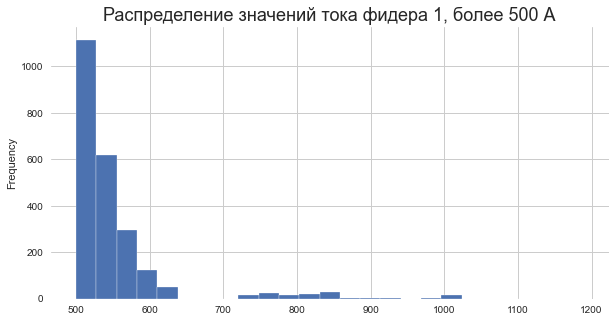

In [648]:
sns.set_style("whitegrid")
fks_1['current'][fks_1['current']>500].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений тока фидера 1, более 500 А", fontsize=18)
plt.show()

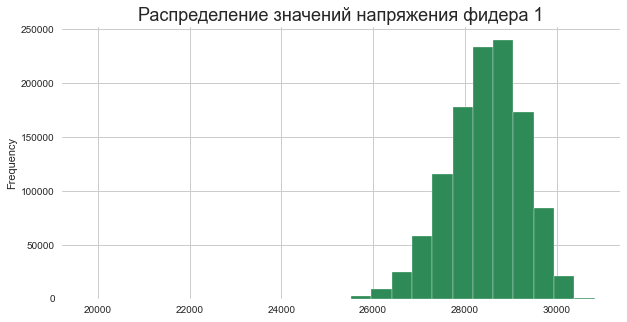

In [649]:
sns.set_style("whitegrid")
fks_1['voltage'].plot(figsize=(10, 5), kind='hist', bins=25, color="seagreen")
plt.title("Распределение значений напряжения фидера 1", fontsize=18)
plt.show()

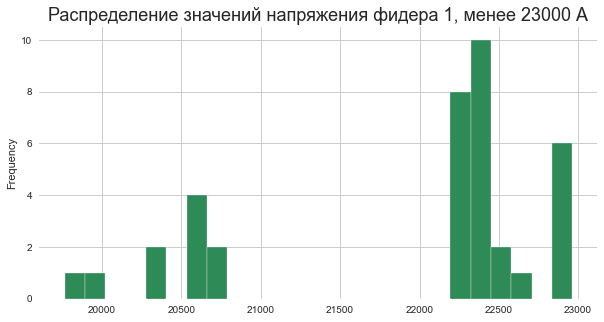

In [650]:
sns.set_style("whitegrid")
fks_1['voltage'][fks_1['voltage']<23000].plot(figsize=(10, 5), kind='hist', bins=25, color="seagreen")
plt.title("Распределение значений напряжения фидера 1, менее 23000 А", fontsize=18)
plt.show()

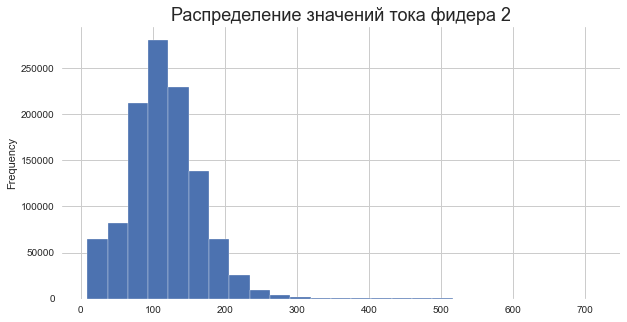

In [651]:
sns.set_style("whitegrid")
fks_2['current'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений тока фидера 2", fontsize=18)
plt.show()

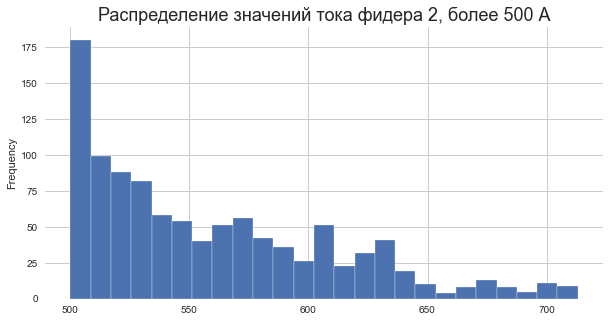

In [652]:
sns.set_style("whitegrid")
fks_2['current'][fks_2['current']>500].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений тока фидера 2, более 500 А", fontsize=18)
plt.show()

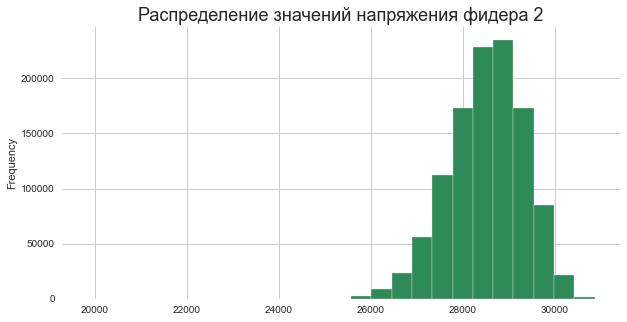

In [653]:
sns.set_style("whitegrid")
fks_2['voltage'].plot(figsize=(10, 5), kind='hist', bins=25, color="seagreen")
plt.title("Распределение значений напряжения фидера 2", fontsize=18)
plt.show()

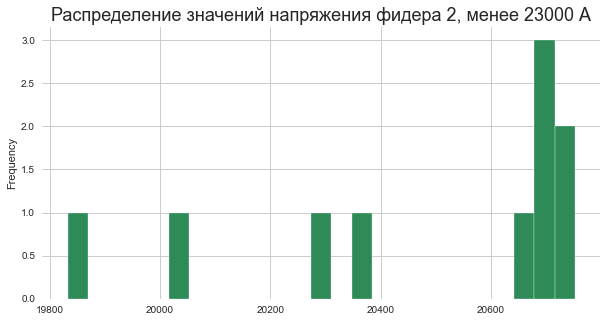

In [654]:
sns.set_style("whitegrid")
fks_2['voltage'][fks_2['voltage']<23000].plot(figsize=(10, 5), kind='hist', bins=25, color="seagreen")
plt.title("Распределение значений напряжения фидера 2, менее 23000 А", fontsize=18)
plt.show()

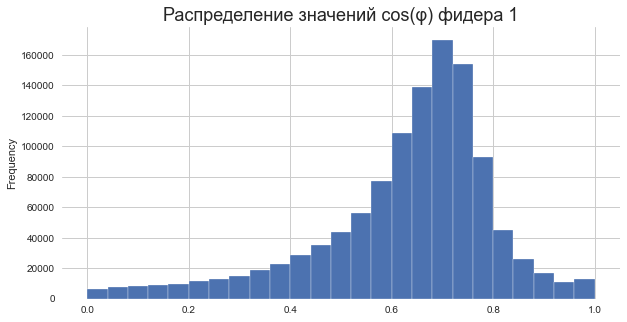

In [655]:
sns.set_style("whitegrid")
fks_1['cos(φ)'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений cos(φ) фидера 1", fontsize=18)
plt.show()

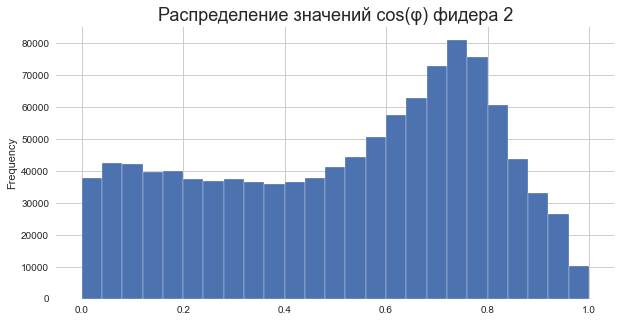

In [656]:
sns.set_style("whitegrid")
fks_2['cos(φ)'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений cos(φ) фидера 2", fontsize=18)
plt.show()

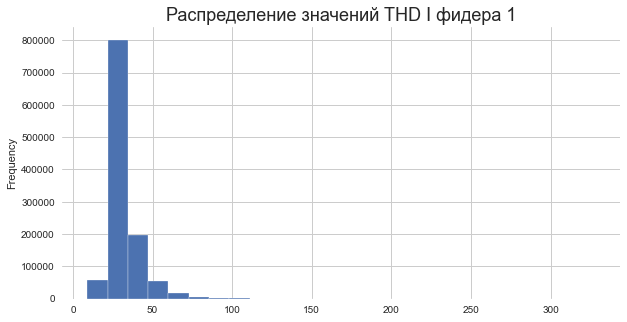

In [657]:
sns.set_style("whitegrid")
fks_1['THD_I'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений THD I фидера 1", fontsize=18)
plt.show()

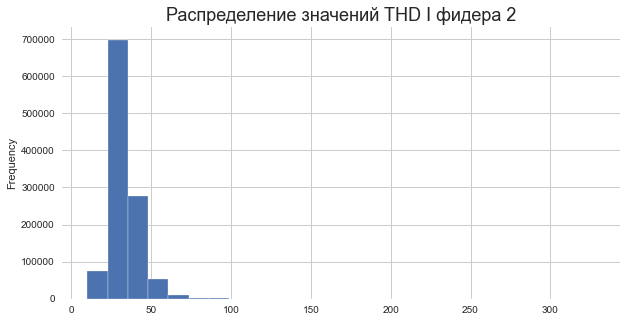

In [658]:
sns.set_style("whitegrid")
fks_2['THD_I'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений THD I фидера 2", fontsize=18)
plt.show()

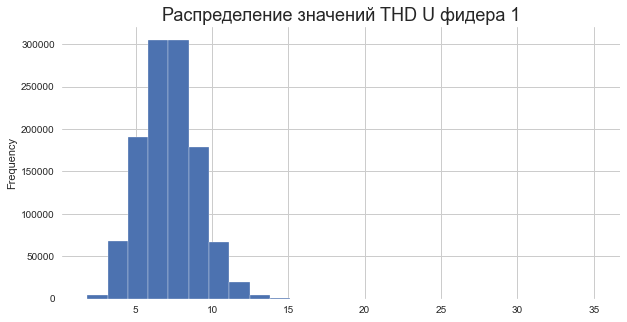

In [659]:
sns.set_style("whitegrid")
fks_1['THD_U'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений THD U фидера 1", fontsize=18)
plt.show()

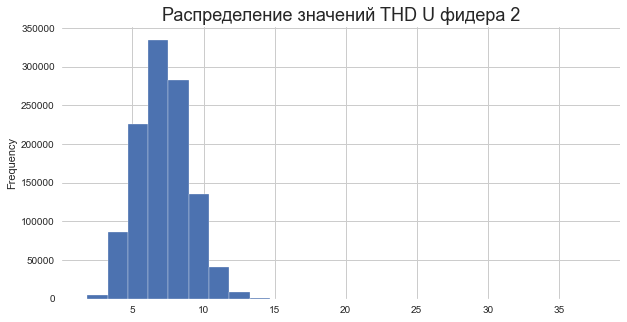

In [660]:
sns.set_style("whitegrid")
fks_2['THD_U'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений THD U фидера 2", fontsize=18)
plt.show()

### Взаимоотношения между переменными

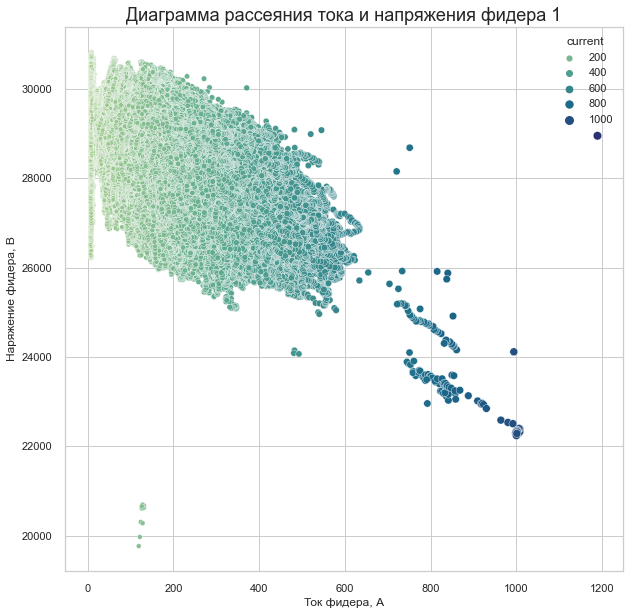

In [661]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_1,
                x=fks_1['current'],
                y=fks_1['voltage'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и напряжения фидера 1", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('Наряжение фидера, В')
plt.show()

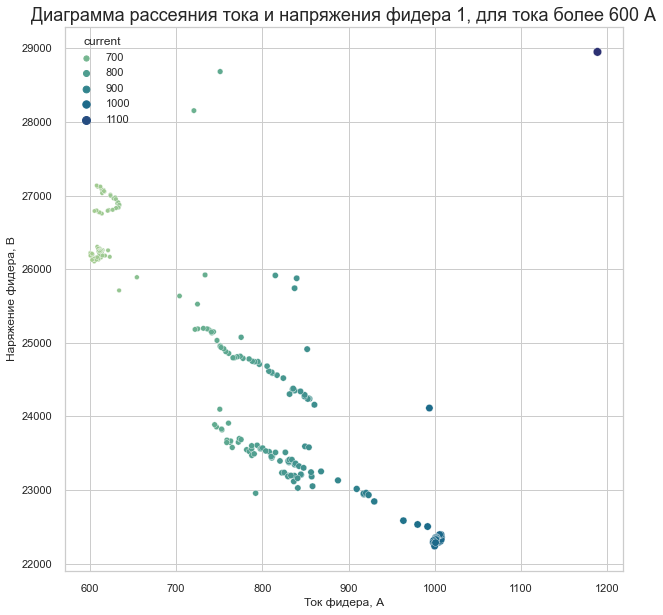

In [662]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

fks_data = fks_1.loc[fks_1['current'] > 600]

sns.scatterplot(data = fks_data,
                x=fks_data['current'],
                y=fks_data['voltage'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и напряжения фидера 1, для тока более 600 А", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('Наряжение фидера, В')
plt.show()

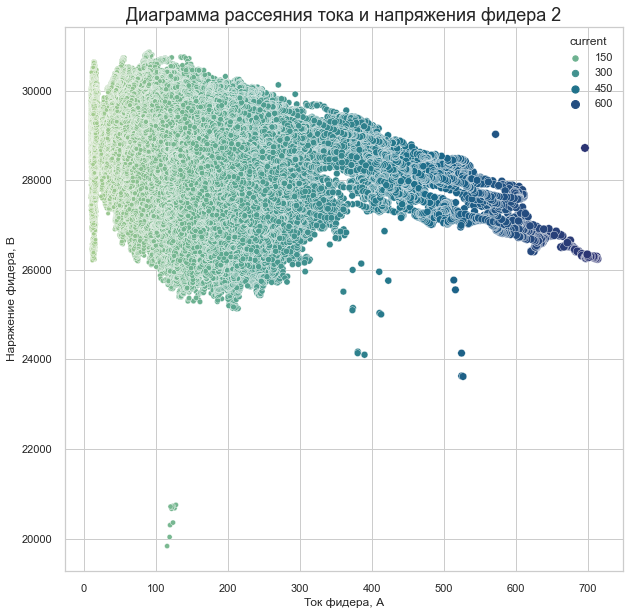

In [663]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_2,
                x=fks_2['current'],
                y=fks_2['voltage'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и напряжения фидера 2", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('Наряжение фидера, В')
plt.show()

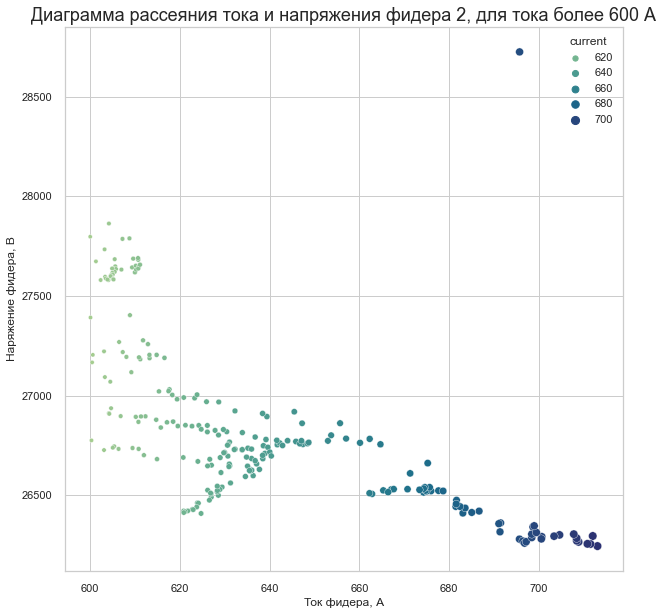

In [664]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

fks_data = fks_2.loc[fks_2['current'] > 600]

sns.scatterplot(data = fks_data,
                x=fks_data['current'],
                y=fks_data['voltage'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и напряжения фидера 2, для тока более 600 А", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('Наряжение фидера, В')
plt.show()

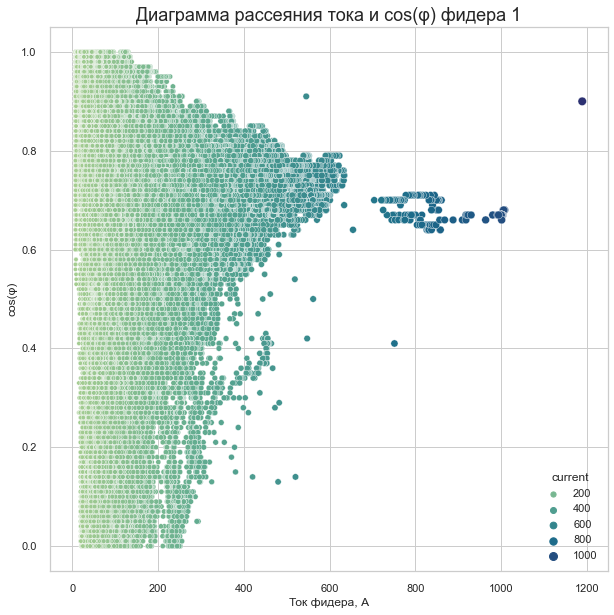

In [665]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_1,
                x=fks_1['current'],
                y=fks_1['cos(φ)'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и cos(φ) фидера 1", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('cos(φ)')
plt.show()

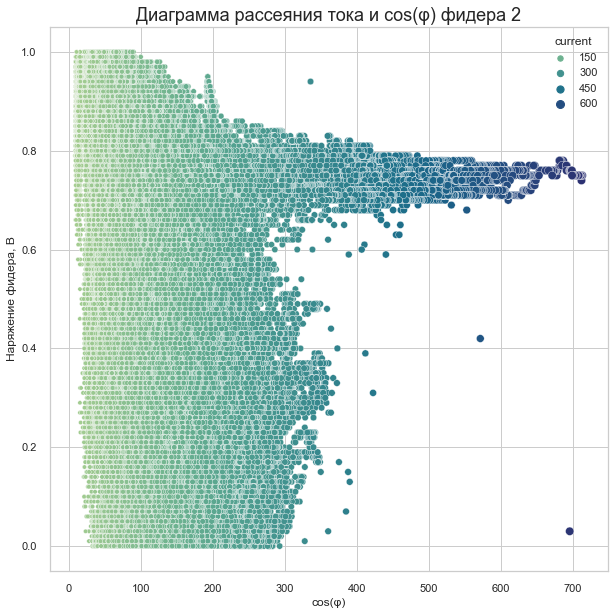

In [666]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_2,
                x=fks_2['current'],
                y=fks_2['cos(φ)'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и cos(φ) фидера 2", fontsize=18)
plt.xlabel('cos(φ)')
plt.ylabel('Наряжение фидера, В')
plt.show()

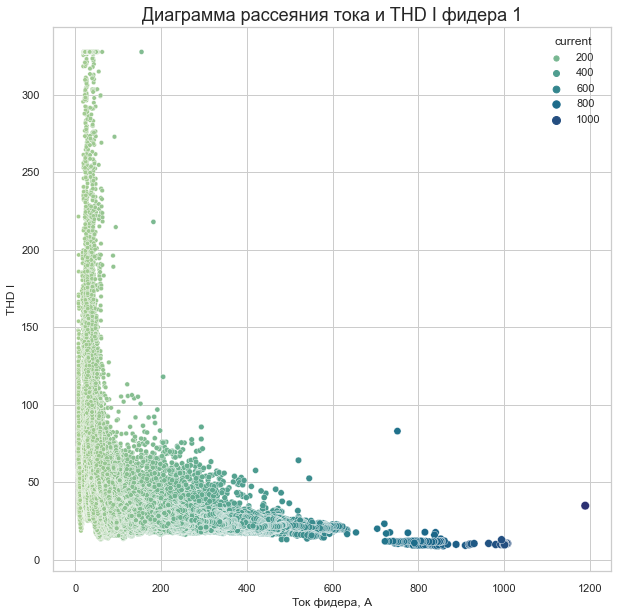

In [667]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_1,
                x=fks_1['current'],
                y=fks_1['THD_I'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и THD I фидера 1", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('THD I')
plt.show()

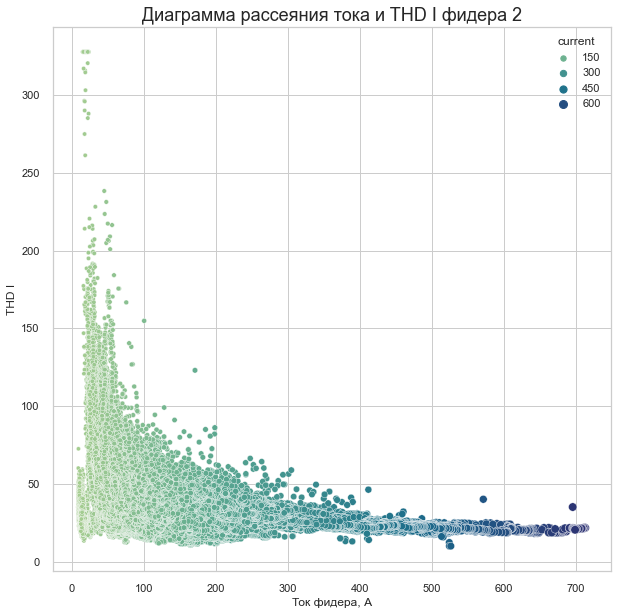

In [668]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_2,
                x=fks_2['current'],
                y=fks_2['THD_I'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и THD I фидера 2", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('THD I')
plt.show()

#### Расчетные значения

In [669]:
# Сопротивление фидера 1
fks_1['impedance'] = fks_1['voltage'] / fks_1['current']
fks_1['impedance'][:5]

time
04:16:25.898000    185.428094
04:16:26.898000    185.367414
04:16:27.898000    186.475338
04:16:28.898000    195.379315
04:16:29.899000    198.651917
Name: impedance, dtype: float64

In [670]:
# Сопротивление фидера 2
fks_2['impedance'] = fks_2['voltage'] / fks_2['current']
fks_2['impedance'][:5]

time
04:03:37.223000    210.020325
04:03:38.223000    214.882077
04:03:39.224000    216.219299
04:03:40.224000    211.327835
04:03:41.224000    212.771922
Name: impedance, dtype: float64

In [671]:
fks_1['φ'] = np.rad2deg(np.arccos(fks_1['cos(φ)']))
fks_1['φ'][:5]

time
04:16:25.898000    36.869898
04:16:26.898000    36.869898
04:16:27.898000    36.869898
04:16:28.898000    36.869898
04:16:29.899000    37.814489
Name: φ, dtype: float64

In [672]:
fks_2['φ'] = np.rad2deg(np.arccos(fks_2['cos(φ)']))
fks_2['φ'][:5]

time
04:03:37.223000    31.788331
04:03:38.223000    32.859880
04:03:39.224000    32.859880
04:03:40.224000    32.859880
04:03:41.224000    32.859880
Name: φ, dtype: float64

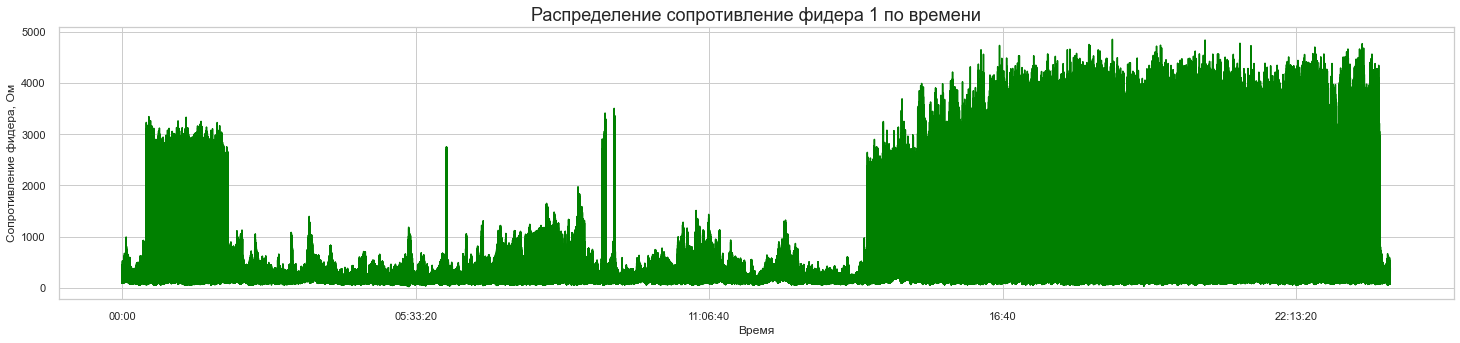

In [673]:
sns.set_style("whitegrid")
fks_1['impedance'].plot(figsize=(25, 5), color="green")
plt.title("Распределение cопротивление фидера 1 по времени", fontsize=18)
plt.xlabel('Время')
plt.ylabel('Сопротивление фидера, Ом')
plt.show()

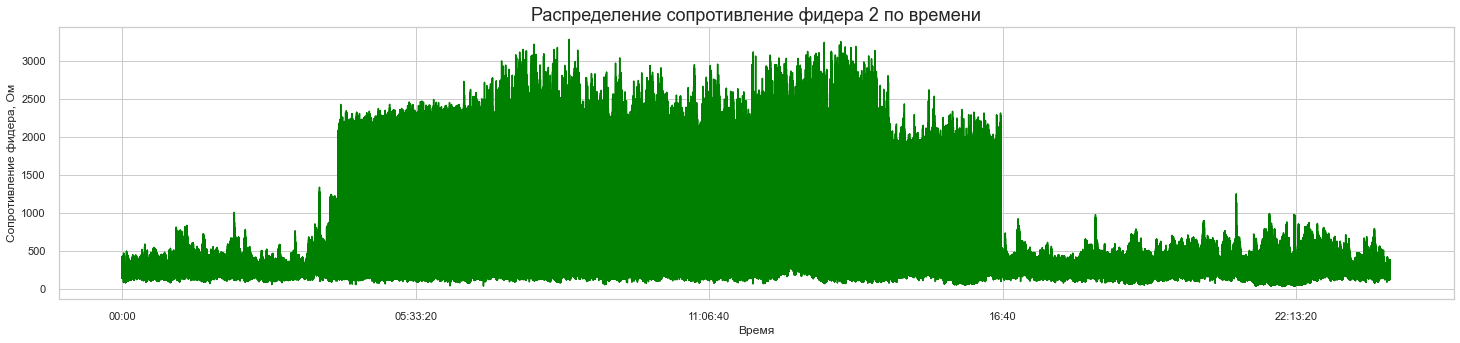

In [674]:
sns.set_style("whitegrid")
fks_2['impedance'].plot(figsize=(25, 5), color="green")
plt.title("Распределение cопротивление фидера 2 по времени", fontsize=18)
plt.xlabel('Время')
plt.ylabel('Сопротивление фидера, Ом')
plt.show()

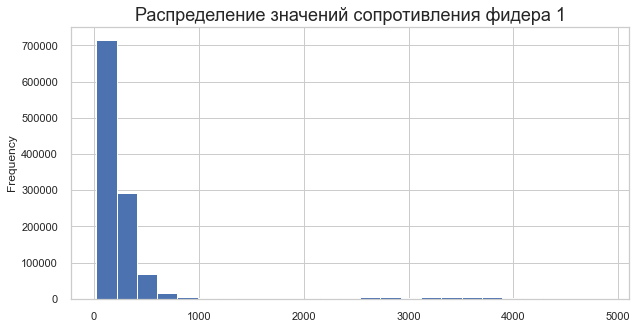

In [675]:
sns.set_style("whitegrid")
fks_1['impedance'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений сопротивления фидера 1", fontsize=18)
plt.show()

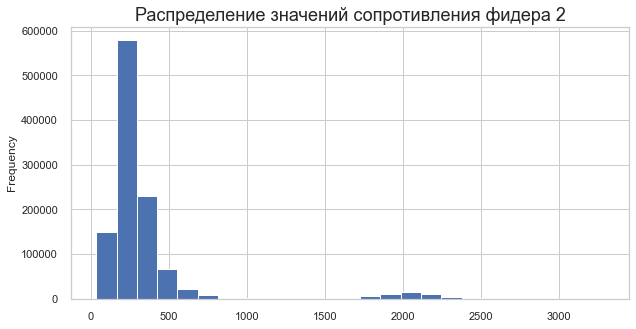

In [676]:
sns.set_style("whitegrid")
fks_2['impedance'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений сопротивления фидера 2", fontsize=18)
plt.show()

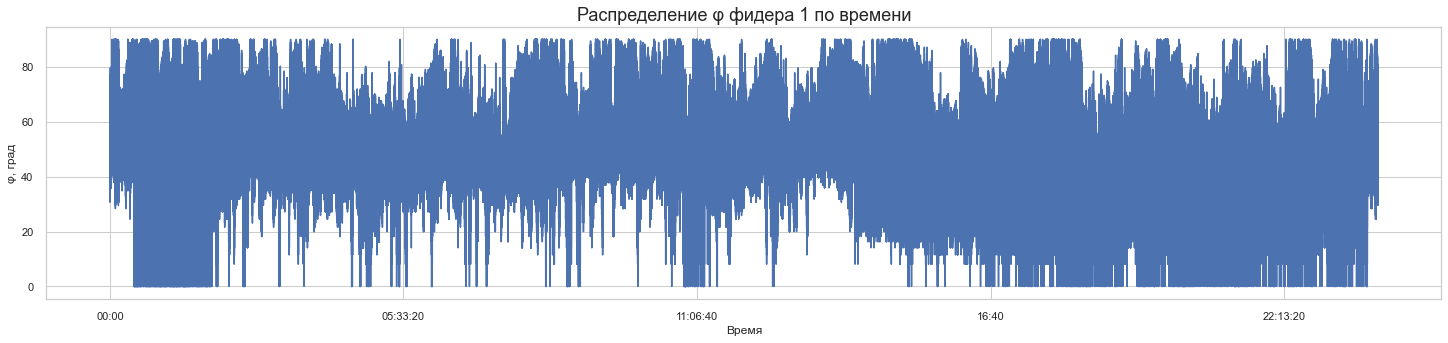

In [677]:
sns.set_style("whitegrid")
fks_1['φ'].plot(figsize=(25, 5))
plt.title("Распределение φ фидера 1 по времени", fontsize=18)
plt.xlabel('Время')
plt.ylabel('φ, град')
plt.show()

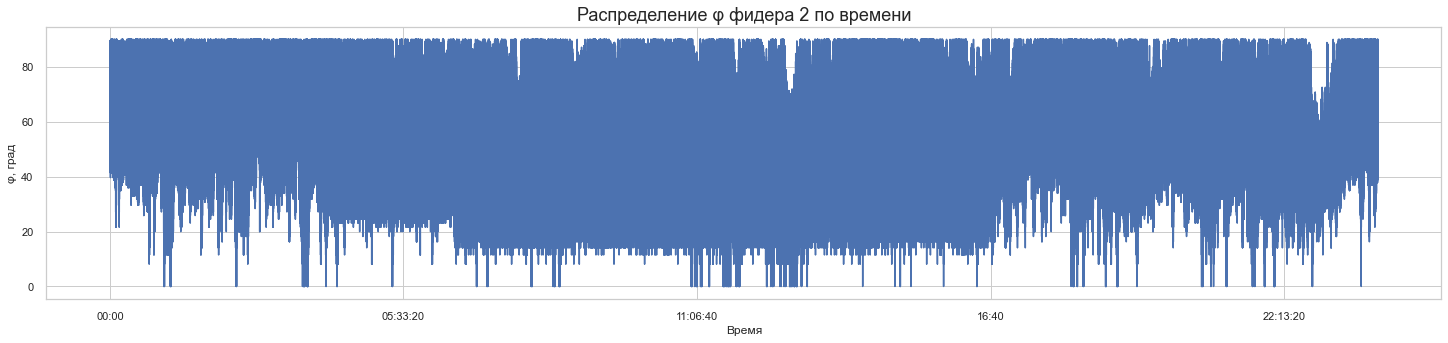

In [678]:
sns.set_style("whitegrid")
fks_2['φ'].plot(figsize=(25, 5))
plt.title("Распределение φ фидера 2 по времени", fontsize=18)
plt.xlabel('Время')
plt.ylabel('φ, град')
plt.show()

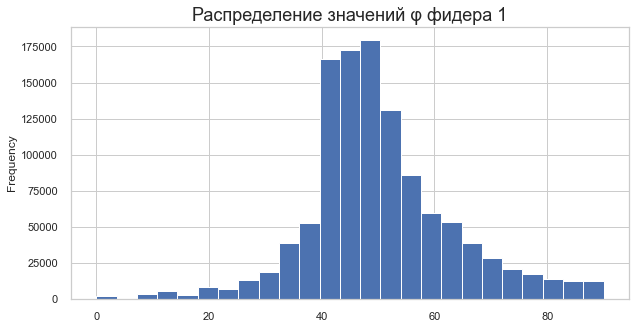

In [679]:
sns.set_style("whitegrid")
fks_1['φ'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений φ фидера 1", fontsize=18)
plt.show()

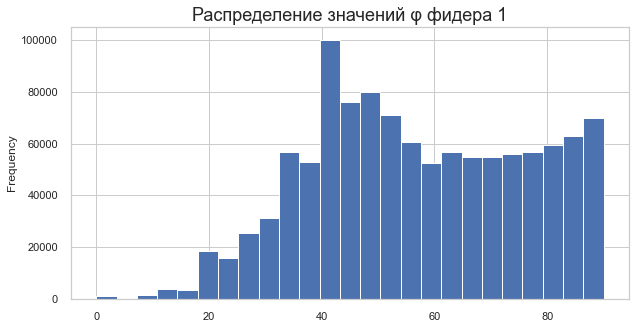

In [680]:
sns.set_style("whitegrid")
fks_2['φ'].plot(figsize=(10, 5), kind='hist', bins=25)
plt.title("Распределение значений φ фидера 1", fontsize=18)
plt.show()

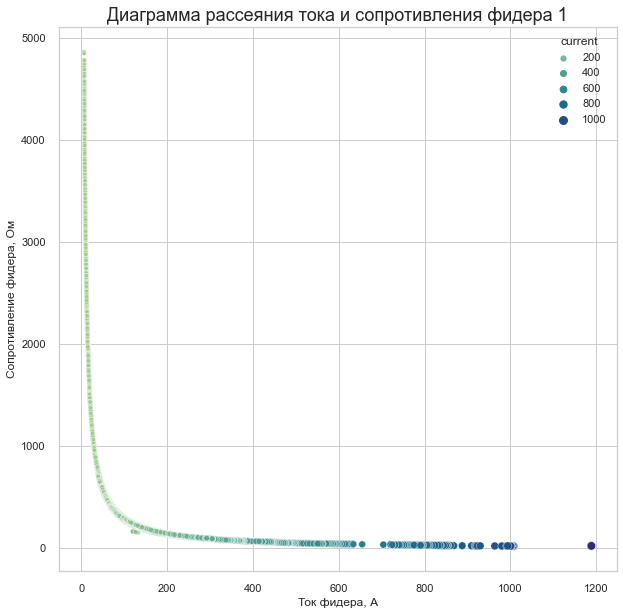

In [681]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_1,
                x=fks_1['current'],
                y=fks_1['impedance'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и сопротивления фидера 1", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('Сопротивление фидера, Ом')
plt.show()

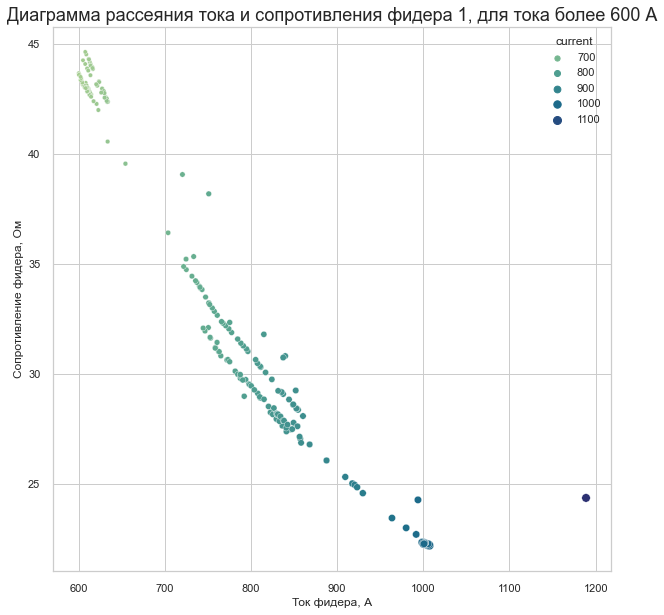

In [682]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

fks_data = fks_1.loc[fks_1['current'] > 600]

sns.scatterplot(data = fks_data,
                x=fks_data['current'],
                y=fks_data['impedance'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и сопротивления фидера 1, для тока более 600 А", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('Сопротивление фидера, Ом')
plt.show()

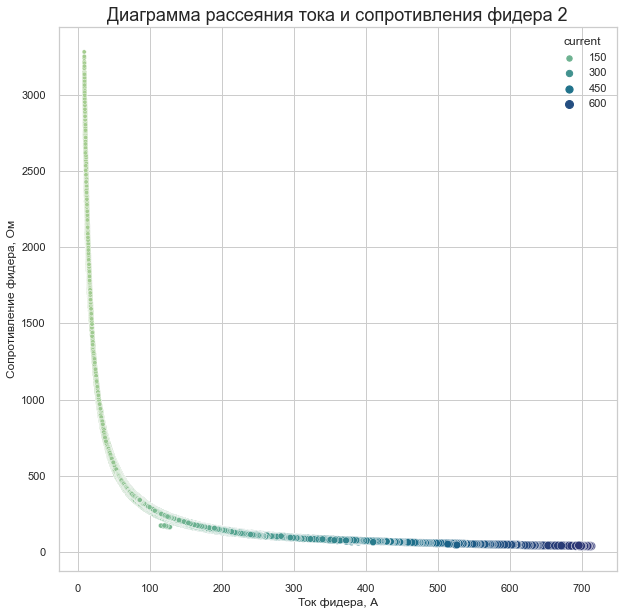

In [683]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_2,
                x=fks_2['current'],
                y=fks_2['impedance'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и сопротивления фидера 2", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('Сопротивление фидера, Ом')
plt.show()

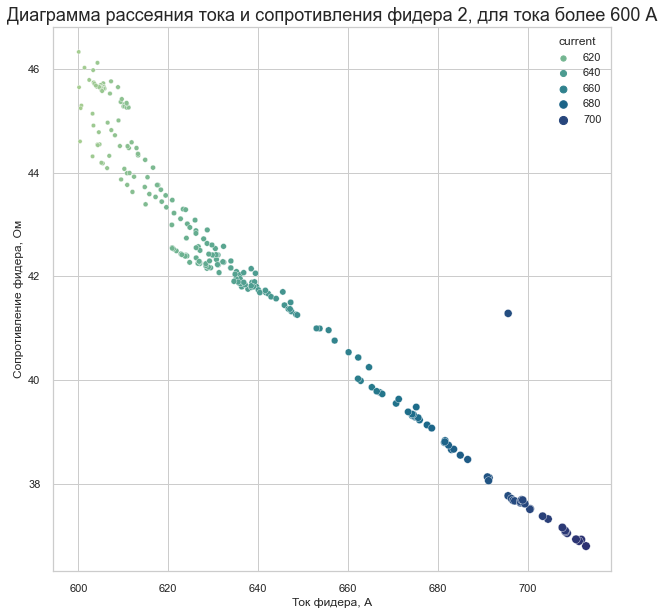

In [684]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

fks_data = fks_2.loc[fks_2['current'] > 600]

sns.scatterplot(data = fks_data,
                x=fks_data['current'],
                y=fks_data['impedance'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и сопротивления фидера 2, для тока более 600 А", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('Сопротивление фидера, Ом')
plt.show()

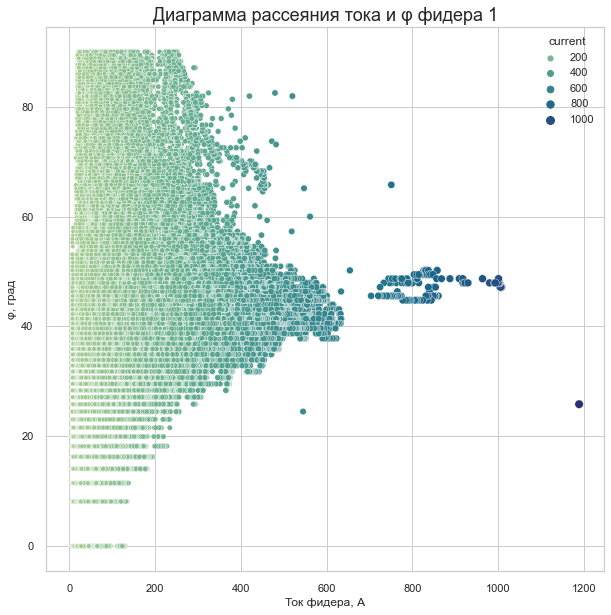

In [685]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_1,
                x=fks_1['current'],
                y=fks_1['φ'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и φ фидера 1", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('φ, град')
plt.show()

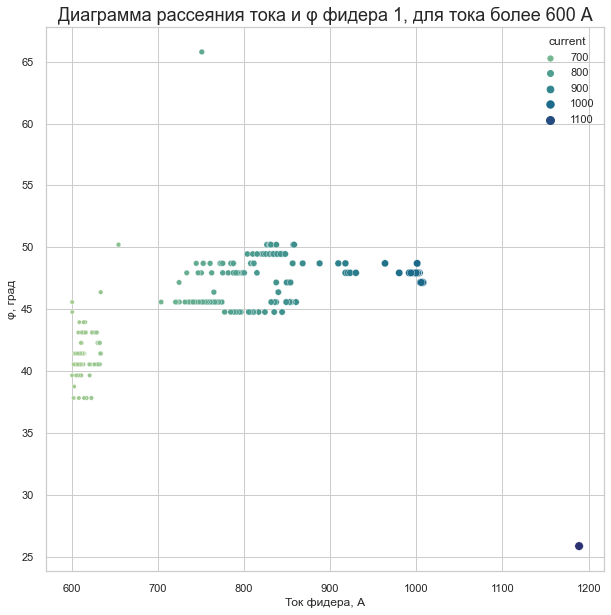

In [686]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

fks_data = fks_1.loc[fks_1['current'] > 600]

sns.scatterplot(data = fks_data,
                x=fks_data['current'],
                y=fks_data['φ'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и φ фидера 1, для тока более 600 А", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('φ, град')
plt.show()

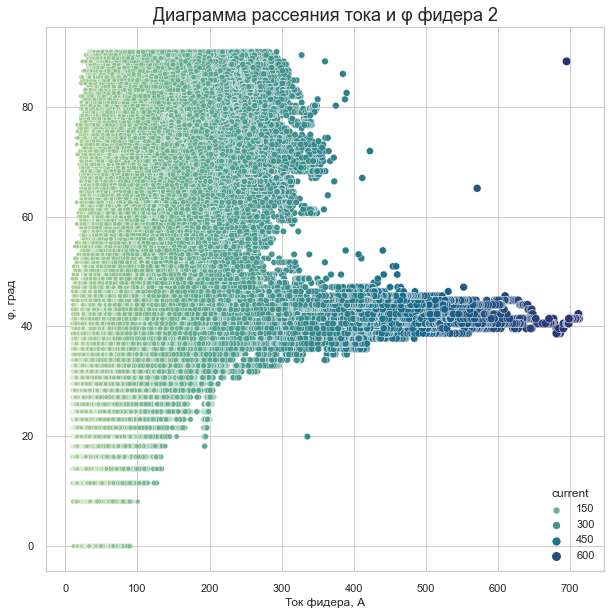

In [687]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.scatterplot(data = fks_2,
                x=fks_2['current'],
                y=fks_2['φ'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и φ фидера 2", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('φ, град')
plt.show()

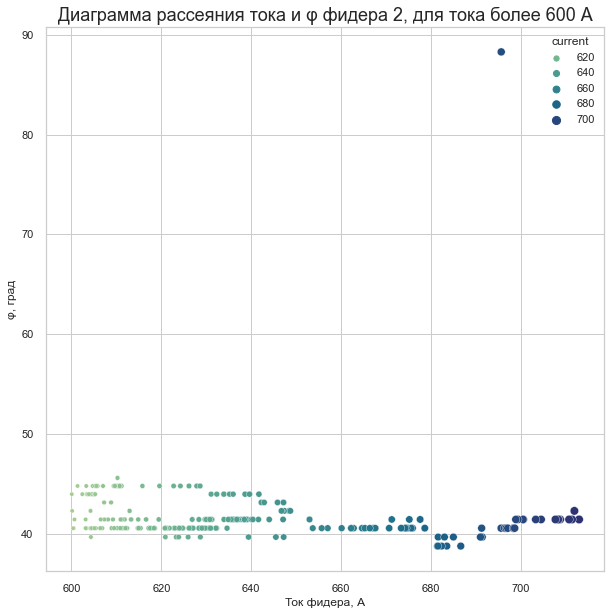

In [688]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

fks_data = fks_2.loc[fks_2['current'] > 600]

sns.scatterplot(data = fks_data,
                x=fks_data['current'],
                y=fks_data['φ'],
                hue="current",
                size="current",
                palette = "crest")

plt.title("Диаграмма рассеяния тока и φ фидера 2, для тока более 600 А", fontsize=18)
plt.xlabel('Ток фидера, А')
plt.ylabel('φ, град')
plt.show()